In [1]:
import pandas as pd

# Load the Berkeley admissions dataset
url = "https://waf.cs.illinois.edu/discovery/berkeley.csv"
df = pd.read_csv(url)
df['Admitted'] = df['Admission'] == 'Accepted'



In [2]:
df.head(), df.shape

(   Year  Major Gender Admission  Admitted
 0  1973      C      F  Rejected     False
 1  1973      B      M  Accepted      True
 2  1973  Other      F  Accepted      True
 3  1973  Other      M  Accepted      True
 4  1973  Other      M  Rejected     False,
 (12763, 5))

In [3]:
# lets first print the probability of accepted for gender F
# P(Admission
ga = df.groupby(['Gender', 'Admission']).sum()
# Compute the probability of admission given gender
total_gender_counts = df.groupby('Gender').size()
admission_gender_counts = df[df['Admission'] == 'Accepted'].groupby('Gender').size()
prob_admission_given_gender = admission_gender_counts / total_gender_counts
print('Probability of admission given gender', prob_admission_given_gender)





Probability of admission given gender Gender
F    0.345753
M    0.442786
dtype: float64


In [4]:
# Calculate joint probability P(Admission, Gender), # add to each row also the product p(admission) * p(gender)
joint_prob = df.groupby(['Admission', 'Gender']).size().reset_index(name='count')
total = len(df)

# compute the joint probability of admission and gender
joint_prob['P(Admission, Gender)'] = joint_prob['count'] / total


# compute the probability of admission given gender
prob_admission_given_gender = df.groupby(['Gender', 'Admission']).size().div(df.groupby('Gender').size()).reset_index(name='P(Admission|Gender)')

# merge the two dataframes on the admission and gender columns
joint_prob = pd.merge(joint_prob, prob_admission_given_gender, on=['Admission', 'Gender'], how='left')


# # compute the probability of admission
prob_admission = df.groupby('Admission').size().div(len(df)).reset_index(name='P(Admission)')

# # compute the probability of gender
prob_gender = df.groupby('Gender').size().div(len(df)).reset_index(name='P(Gender)')

# merge them into joint_prob
joint_prob = pd.merge(joint_prob, prob_admission, on='Admission', how='left')
joint_prob = pd.merge(joint_prob, prob_gender, on='Gender', how='left')


# # add a column that is the product of the probability of admission, gender
# joint_prob['P(Admission)* P(Gender)'] = joint_prob['P(Admission|Gender)'] * joint_prob['P(Admission, Gender)']


# # merge the dataframes on the admission and gender columns
# joint_prob = pd.merge(prob_admission_given_gender, prob_admission, on='Admission', how='left')
# joint_prob = pd.merge(joint_prob, prob_gender, on='Gender', how='left')

# # add a column that is the product of the probability of admission, gender
joint_prob['P(Admission)* P(Gender)'] = joint_prob['P(Admission)'] * joint_prob['P(Gender)']

# joint_prob = pd.merge(joint_prob, prob_admission, on='Admission')
# joint_prob = pd.merge(joint_prob, prob_gender, on='Gender')

joint_prob 












,Admission,Gender,count,"P(Admission, Gender)",P(Admission|Gender),P(Admission),P(Gender),P(Admission)* P(Gender)
0,Accepted,F,1494,0.117057,0.345753,0.409935,0.338557,0.138786
1,Accepted,M,3738,0.292878,0.442786,0.409935,0.661443,0.271149
2,Rejected,F,2827,0.221500,0.654247,0.590065,0.338557,0.199771
3,Rejected,M,4704,0.368565,0.557214,0.590065,0.661443,0.390295


In [5]:
# Compute the probability of being admitted given gender and major
# Calculate P(Admitted|Gender,Major)
prob_admitted_given_gender_major = df[df['Admission'] == 'Accepted'].groupby(['Gender', 'Major']).size() / df.groupby(['Gender', 'Major']).size()
prob_admitted_given_gender_major = prob_admitted_given_gender_major.reset_index(name='P(Admitted|Gender,Major)')
print(prob_admitted_given_gender_major)

# Calculate P(Admitted|Major)
prob_admitted_given_major = df[df['Admission'] == 'Accepted'].groupby('Major').size() / df.groupby('Major').size()
prob_admitted_given_major = prob_admitted_given_major.reset_index(name='P(Admitted|Major)')
print(prob_admitted_given_major)

#merge the two dataframes on the major column
prob_admitted_given_gender_major = pd.merge(prob_admitted_given_gender_major, prob_admitted_given_major, on='Major')
print(prob_admitted_given_gender_major)

# sort by P(Admitted|Gender,Major) descending
prob_admitted_given_gender_major.sort_values(by='P(Admitted|Gender,Major)', ascending=False)




# 

   Gender  Major  P(Admitted|Gender,Major)
0       F      A                  0.824074
1       F      B                  0.680000
2       F      C                  0.338954
3       F      D                  0.349333
4       F      E                  0.239186
5       F      F                  0.073314
6       F  Other                  0.376911
7       M      A                  0.724956
8       M      B                  0.630357
9       M      C                  0.369231
10      M      D                  0.330935
11      M      E                  0.277487
12      M      F                  0.058981
13      M  Other                  0.409526
   Major  P(Admitted|Major)
0      A           0.733547
1      B           0.632479
2      C           0.349673
3      D           0.339646
4      E           0.251712
5      F           0.065826
6  Other           0.399293
   Gender  Major  P(Admitted|Gender,Major)  P(Admitted|Major)
0       F      A                  0.824074           0.733547
1      

,Gender,Major,"P(Admitted|Gender,Major)",P(Admitted|Major)
0,F,A,0.824074,0.733547
7,M,A,0.724956,0.733547
1,F,B,0.680000,0.632479
8,M,B,0.630357,0.632479
13,M,Other,0.409526,0.399293
6,F,Other,0.376911,0.399293
9,M,C,0.369231,0.349673
3,F,D,0.349333,0.339646
2,F,C,0.338954,0.349673
10,M,D,0.330935,0.339646


## Probability of Admission Given Gender

Let's first examine the overall probability of acceptance based solely on gender, without considering the major. This demonstrates an apparent gender bias.

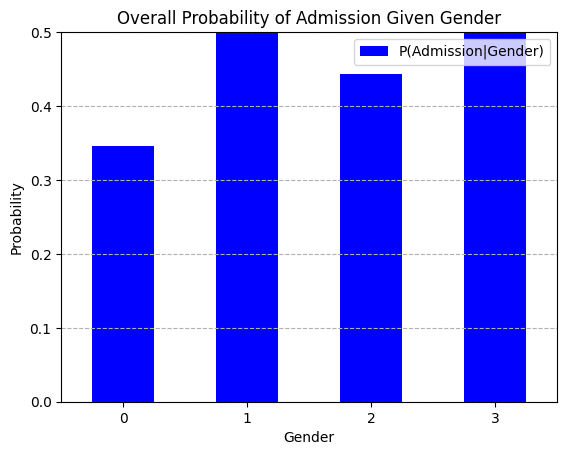

In [6]:

import matplotlib.pyplot as plt

prob_admission_given_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Overall Probability of Admission Given Gender')
plt.ylabel('Probability')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--')
plt.show()


## Probability of Admission Conditioned on Major

When we condition on the academic major, the difference in admission probability between genders reduces significantly, illustrating Simpson's paradox.

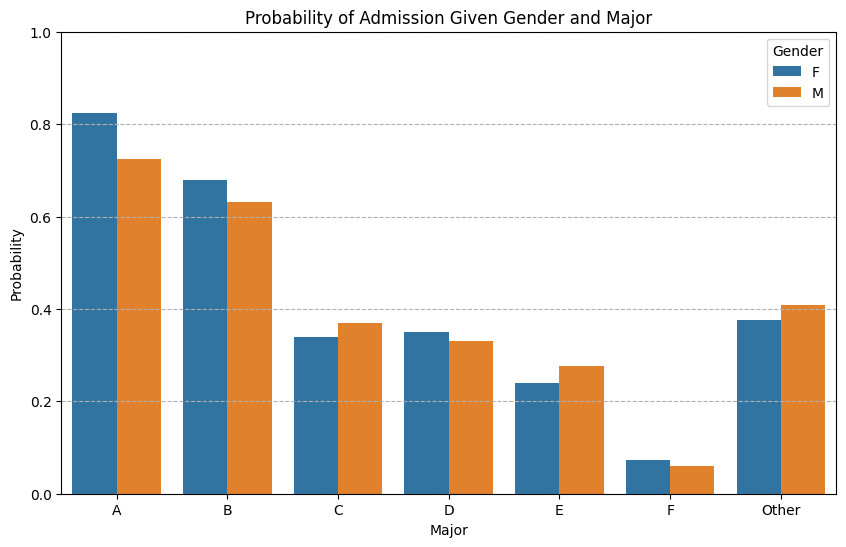

In [7]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=prob_admitted_given_gender_major, x='Major', y='P(Admitted|Gender,Major)', hue='Gender')
plt.title('Probability of Admission Given Gender and Major')
plt.ylabel('Probability')
plt.xlabel('Major')
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--')
plt.show()


## Probabilities Conditional on Major

Below we show probabilities conditioned on major, structured similarly to previous tables but now explicitly showing the conditioning on majors.

In [ ]:

# Calculate probabilities conditioned on Major
conditional_major_df = df.groupby(['Major', 'Gender', 'Admission']).size().reset_index(name='count')

# Total count per major and gender
total_per_major_gender = df.groupby(['Major', 'Gender']).size().reset_index(name='total_major_gender')
conditional_major_df = conditional_major_df.merge(total_per_major_gender, on=['Major', 'Gender'])
conditional_major_df['P(Admission|Major, Gender)'] = conditional_major_df['count'] / conditional_major_df['total_major_gender']

# Probability of Admission given Major
total_per_major = df.groupby('Major').size().reset_index(name='total_major')
admission_per_major = df[df['Admission']=='Accepted'].groupby('Major').size().reset_index(name='admission_major')
prob_admission_given_major = admission_per_major.merge(total_per_major, on='Major')
prob_admission_given_major['P(Admission|Major)'] = prob_admission_given_major['admission_major'] / prob_admission_given_major['total_major']

# Probability of Gender given Major
gender_per_major = df.groupby(['Major', 'Gender']).size().reset_index(name='count_gender_major')
gender_per_major = gender_per_major.merge(total_per_major, on='Major')
gender_per_major['P(Gender|Major)'] = gender_per_major['count_gender_major'] / gender_per_major['total_major']

# Merge probabilities back into conditional_major_df
conditional_major_df = conditional_major_df.merge(prob_admission_given_major[['Major', 'P(Admission|Major)']], on='Major')
conditional_major_df = conditional_major_df.merge(gender_per_major[['Major', 'Gender', 'P(Gender|Major)']], on=['Major', 'Gender'])

# Calculate P(Admission|Major)*P(Gender|Major)
conditional_major_df['P(Admission|Major)*P(Gender|Major)'] = conditional_major_df['P(Admission|Major)'] * conditional_major_df['P(Gender|Major)']

conditional_major_df.sort_values(by=['Major', 'Gender', 'Admission'], inplace=True)
conditional_major_df
